In [3]:
#import relevant libraries for the data analysis
import pandas as pd
import numpy as np
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
print('libraries imported')
pd.set_option('display.max_columns', None)

libraries imported


In [4]:
#import the dataset
website_url='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
Df= pd.read_csv(website_url)
Df.head()
Df.tail()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,,NaN,2,Injury Collision,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Raining,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,,NaN,2,Injury Collision,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,GREENWOOD AVE N AND N 68TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,34TH AVE BETWEEN E MARION ST AND E SPRING ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2018/11/30 00:00:00+00,11/30/2018 3:45:00 PM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [5]:
## The Exploratory data analysis
# count the incidents in each year
df=Df[['SEVERITYCODE','COLLISIONTYPE','JUNCTIONTYPE','ADDRTYPE','OBJECTID','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
df_1=df.dropna()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183310 entries, 0 to 194672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   183310 non-null  int64 
 1   COLLISIONTYPE  183310 non-null  object
 2   JUNCTIONTYPE   183310 non-null  object
 3   ADDRTYPE       183310 non-null  object
 4   OBJECTID       183310 non-null  int64 
 5   PERSONCOUNT    183310 non-null  int64 
 6   PEDCOUNT       183310 non-null  int64 
 7   PEDCYLCOUNT    183310 non-null  int64 
 8   VEHCOUNT       183310 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 14.0+ MB


In [6]:
incidents_type=df_1['OBJECTID'].groupby([df_1['SEVERITYCODE'],df_1['COLLISIONTYPE']]).agg({'count'})
incidents_type=incidents_type.reset_index()
incidents_type

,SEVERITYCODE,COLLISIONTYPE,count
0,1,Angles,20912
1,1,Cycles,661
2,1,Head On,1133
3,1,Left Turn,8252
4,1,Other,17019
5,1,Parked Car,40627
6,1,Pedestrian,663
7,1,Rear Ended,19148
8,1,Right Turn,2327
9,1,Sideswipe,15839


In [7]:
f1=incidents_type[incidents_type.SEVERITYCODE==1]
f2=incidents_type[incidents_type.SEVERITYCODE==2]

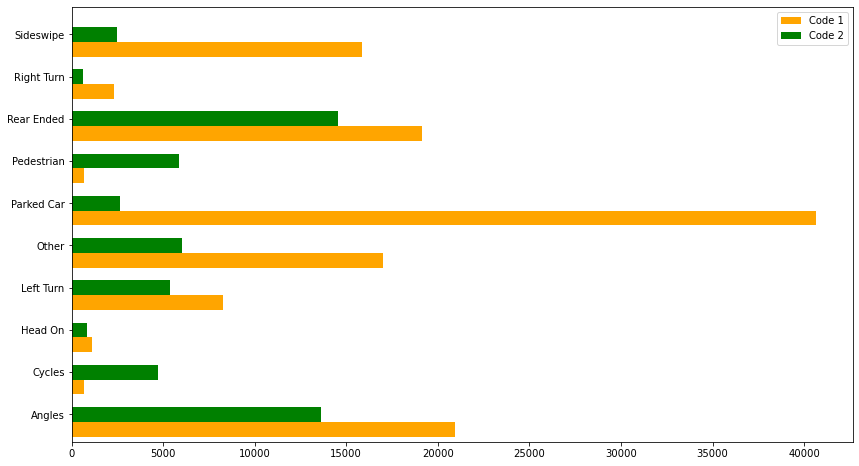

In [8]:
labels=f1['COLLISIONTYPE']
s1=f1['count']
s2=f2['count']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(14,8))
ax.barh(x, s1, width, color='orange', label='Code 1')
ax.barh(x + width, s2, width, color='green', label='Code 2')

ax.set(yticks=x + width, yticklabels=labels, ylim=[2*width - 1, len(labels)])
ax.legend()

plt.show()

plt.show()

In [16]:
weather_type=Df['OBJECTID'].groupby([Df['SEVERITYCODE'],Df['WEATHER']]).agg({'count'})
weather_type=weather_type.reset_index()
weather_type
w1=weather_type[weather_type.SEVERITYCODE==1]
w2=weather_type[weather_type.SEVERITYCODE==2]

w1
w2


,SEVERITYCODE,WEATHER,count
11,2,Blowing Sand/Dirt,15
12,2,Clear,35840
13,2,Fog/Smog/Smoke,187
14,2,Other,116
15,2,Overcast,8745
16,2,Partly Cloudy,3
17,2,Raining,11176
18,2,Severe Crosswind,7
19,2,Sleet/Hail/Freezing Rain,28
20,2,Snowing,171


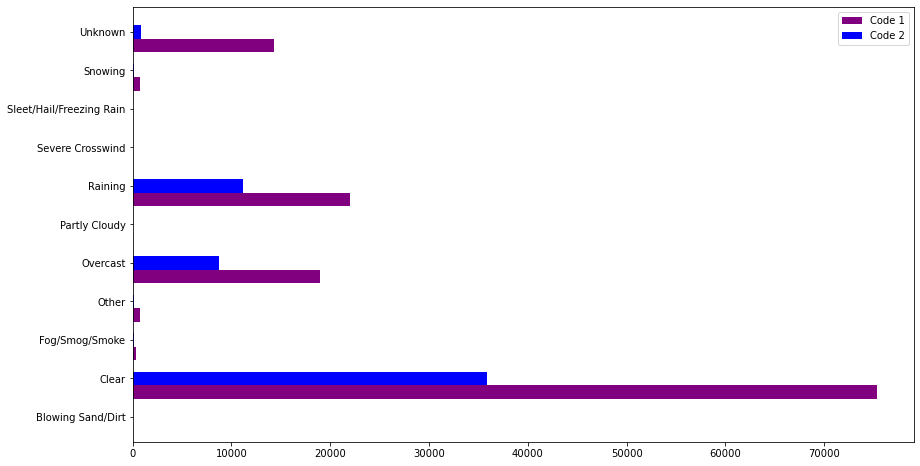

In [17]:

labels=w1['WEATHER']
q1=w1['count']
q2=w2['count']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(14,8))
ax.barh(x, q1, width, color='purple', label='Code 1')
ax.barh(x + width, q2, width, color='blue', label='Code 2')

ax.set(yticks=x + width, yticklabels=labels, ylim=[2*width - 1, len(labels)])
ax.legend()

plt.show()

In [18]:
junction_type=Df['OBJECTID'].groupby([Df['SEVERITYCODE'],Df['JUNCTIONTYPE']]).agg({'count'})
junction_type=junction_type.reset_index()
junction_type
j1=junction_type[junction_type.SEVERITYCODE==1]
j2=junction_type[junction_type.SEVERITYCODE==2]

j1
j2

,SEVERITYCODE,JUNCTIONTYPE,count
7,2,At Intersection (but not related to intersection),623
8,2,At Intersection (intersection related),27174
9,2,Driveway Junction,3234
10,2,Mid-Block (but intersection related),7297
11,2,Mid-Block (not related to intersection),19404
12,2,Ramp Junction,54
13,2,Unknown,2


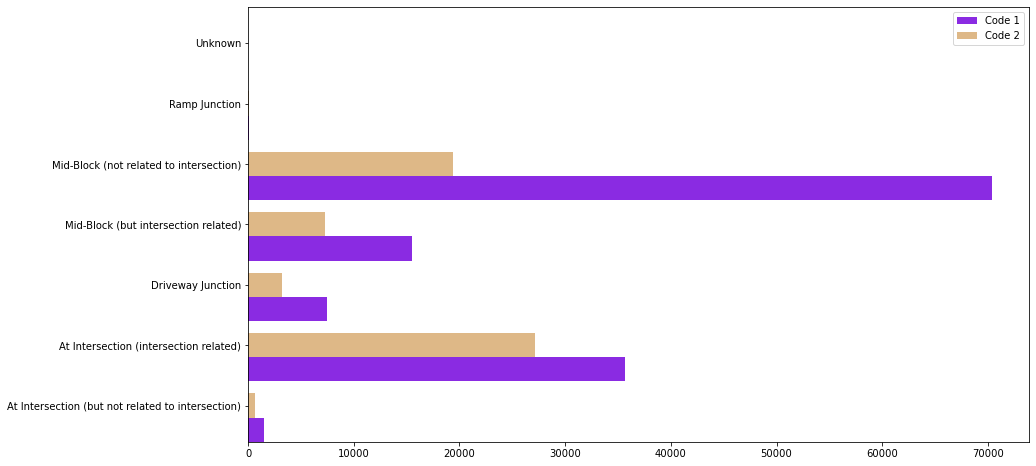

In [22]:

label3=j1['JUNCTIONTYPE']
jf1=j1['count']
jf2=j2['count']

x = np.arange(len(label3))  # the label locations
width = 0.4  # the width of the bars


fig, ax = plt.subplots(figsize=(14,8))
ax.barh(x, jf1, width, color='blueviolet', label='Code 1')
ax.barh(x + width, jf2, width, color='burlywood', label='Code 2')

ax.set(yticks=x + width, yticklabels=label3, ylim=[2*width - 1, len(label3)])
ax.legend()

plt.show()

In [23]:
ROADCOND=Df['OBJECTID'].groupby([Df['SEVERITYCODE'],Df['ROADCOND']]).agg({'count'})
ROADCOND=ROADCOND.reset_index()
ROADCOND
r1=ROADCOND[ROADCOND.SEVERITYCODE==1]
r2=ROADCOND[ROADCOND.SEVERITYCODE==2]

r1
r2

,SEVERITYCODE,ROADCOND,count
9,2,Dry,40064
10,2,Ice,273
11,2,Oil,24
12,2,Other,43
13,2,Sand/Mud/Dirt,23
14,2,Snow/Slush,167
15,2,Standing Water,30
16,2,Unknown,749
17,2,Wet,15755


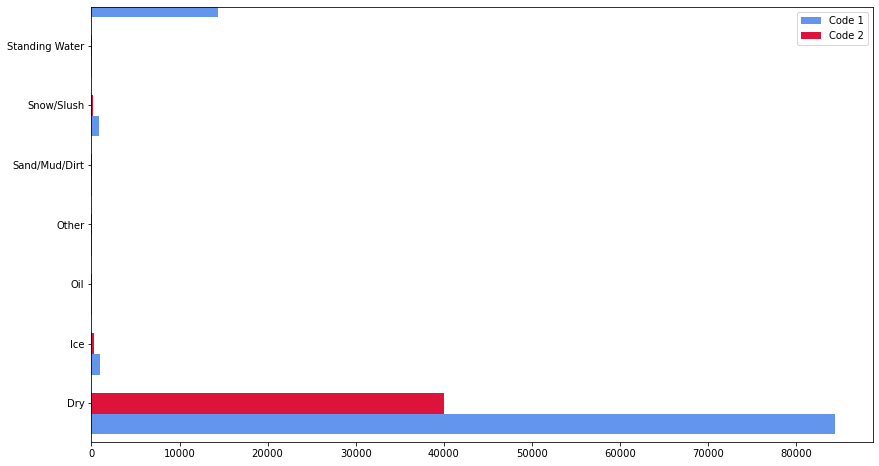

In [25]:
label4=r1['ROADCOND']
rf1=r1['count']
rf2=r2['count']

x = np.arange(len(label4))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(14,8))
ax.barh(x, rf1, width, color='cornflowerblue', label='Code 1')
ax.barh(x + width, rf2, width, color='crimson', label='Code 2')

ax.set(yticks=x + width, yticklabels=label4, ylim=[2*width - 1, len(label3)])
ax.legend()

plt.show()

In [26]:
LIGHTCOND=Df['OBJECTID'].groupby([Df['SEVERITYCODE'],Df['LIGHTCOND']]).agg({'count'})
LIGHTCOND=LIGHTCOND.reset_index()
LIGHTCOND
l1=LIGHTCOND[LIGHTCOND.SEVERITYCODE==1]
l2=LIGHTCOND[LIGHTCOND.SEVERITYCODE==2]

l1
l2

,SEVERITYCODE,LIGHTCOND,count
9,2,Dark - No Street Lights,334
10,2,Dark - Street Lights Off,316
11,2,Dark - Street Lights On,14475
12,2,Dark - Unknown Lighting,4
13,2,Dawn,824
14,2,Daylight,38544
15,2,Dusk,1944
16,2,Other,52
17,2,Unknown,605


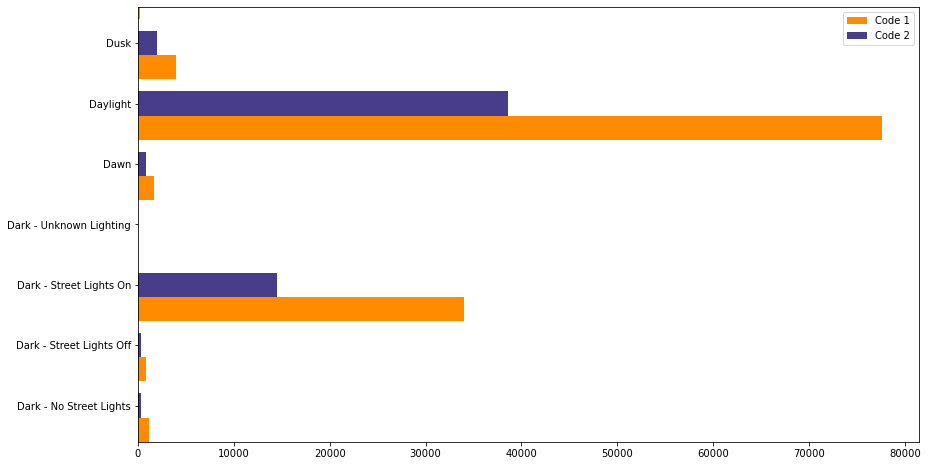

In [27]:
label5=l1['LIGHTCOND']
lf1=l1['count']
lf2=l2['count']

x = np.arange(len(label5))  # the label locations
width = 0.4  # the width of the bars


fig, ax = plt.subplots(figsize=(14,8))
ax.barh(x, lf1, width, color='darkorange', label='Code 1')
ax.barh(x + width, lf2, width, color='darkslateblue', label='Code 2')

ax.set(yticks=x + width, yticklabels=label5, ylim=[2*width - 1, len(label3)])
ax.legend()

plt.show()